In [1]:
# Dependencies and Setup I
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Dependencies and Setup II

import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
import scipy
from scipy.stats import ttest_ind
from sqlalchemy import func
import itertools
from itertools import chain

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Step 1


* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

#### Creating The Engine to connect to  "hawaii.sqlite" database

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

#### Create    automap_base()    to reflect your tables into classes 
   * Reflect Tables into SQLAlchemy ORM

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Used `engine.execute` to select and display the first 5 rows from the 'measurement' table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [7]:
# Used `engine.execute` to select and display the first 5 rows from the 'station' table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

#### Save a reference for both the classes called 'Station' and 'Measurement'

In [8]:
# Save reference to Measurment table
Measurement = Base.classes.measurement

# Save reference to Station table
Station = Base.classes.station

#### Session (link) from Python to the DataBase

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Measurement Table

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Using the inspector to print the column names within the 'measurement' table and its types.
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])  # Get column information 

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


### Station Table

In [11]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Using the inspector to print the column names within the 'station' table and its types.
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])  # Get column information 

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Step 2 :  Exploratory Climate Analysis

### Date Query
* Query the last date in our database
* Retrieve the date one year from last date

In [12]:
# Query the last date from Measurment Table (column 'date')
lastest_date =session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(lastest_date)

2017-08-23


In [13]:
# Calculate the date 1 year ago from the last data point in the database
# date one year ago from ('2017-08-23',)
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


## Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results

* Calculate the date 1 year ago from the last data point in the database

* Perform a query and only select only the `date` and `prcp` values/scores.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Save the query results as a Pandas DataFrame and set the index to the date column

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

In [14]:
# Design a query to retrieve the last 12 months of precipitation data Selecting Only the `date` and `prcp` Values
# Plot the results
lastyear_prcp_date = session.query(Measurement.date, Measurement.prcp).\
                          filter( Measurement.date >= year_ago ).\
                          order_by(Measurement.date.desc()).all()
lastyear_prcp_date[:5]

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0)]

In [15]:
# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.prcp).\
              order_by(Measurement.date.desc()).all()
prcp_scores[:5]

[(0.0), (0.0), (0.08), (0.45), (0.0)]

### Create DataFrame (option 1)

In [16]:
# Save the query results as a Pandas DataFrame
# Set the index to the date column 
# Sort the dataframe by date

df = pd.DataFrame(lastyear_prcp_date, columns=["Date", "Precipitation"])
df.set_index('Date', inplace=True)     # we set index to be use later in our plot as x-axis
df.sort_values('Date', inplace=True)   # inplace= True will over-write in dataframe and makes the change permanant
df.head()

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN


### Create DataFrame  (option 2)

In [17]:
# Perform a query to retrieve the data and precipitation scores
date = [d[0] for d in lastyear_prcp_date]
precipitation = [p[1] for p in lastyear_prcp_date]

# Save the query results as a Pandas DataFrame 
climate_df = pd.DataFrame({'Date' : date,
                           'Precipitation' : precipitation})

# Set the index to the date column
climate_df =climate_df.set_index('Date')
# Sort the dataframe by date
climate_df = climate_df.sort_values('Date')
climate_df.head()

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN


### Rain Perciptation Analysis Graph (via Matplotlib)

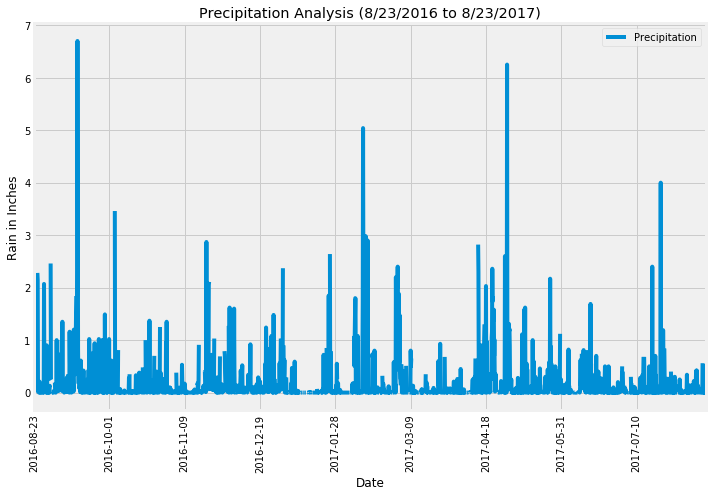

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation Analysis (8/23/2016 to 8/23/2017)", figsize=(10,7))
plt.legend(loc='upper right')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Images/precipitation.png")
plt.show()

----------
#### Use Pandas to Calcualte the Summary Statistics for the Precipitation Data

In [19]:
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

####  Design a query to calculate the total number of stations.

In [20]:
# # Design a query to show how many stations are available in this dataset? 'measurement', 'station'
stations = session.query(Measurement).group_by(Measurement.station).count()
print (f'Total Number of Stations:  {stations}')

#    **************** Other Ways to find do this Query ****************

#           stations = session.query(func.count(Station.id)).all()

#           stations = session.query(Measurement.station).distinct().count()

Total Number of Stations:  9


### Where are the Most Active Stations?

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active= session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active

#               **************** or it can be find using SQL  ****************

# engine.execute('select station, count(station) as count from measurement group by station order by count desc').fetchall()

#

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### Which station has the highest number of observations?

In [22]:
most_active_one = session.query(Measurement.station, func.count(Measurement.station)).\
                  group_by(Measurement.station).\
                  order_by(func.count(Measurement.station).desc()).first()

print (f'Station {most_active_one[0]} has the highest number of observation: {most_active_one[1]} weather obeservations')


Station USC00519281 has the highest number of observation: 2772 weather obeservations


In [23]:
# Using the station id from the previous query of the most active station, calculate:
# lowest temperature recorded 
# highest temperature recorded
# average temperature 

sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

most_active_stats = session.query(*sel).filter(Measurement.station == "USC00519281").all()

print (f' Lowest  Temp for station {most_active[0][0]} is \033[1m{most_active_stats[0][0]}°F\033[0m')
print (f' Highest Temp for station {most_active[0][0]} is \033[1m{most_active_stats[0][1]}°F\033[0m')
print (f' Average Temp for station {most_active[0][0]} is \033[1m{round(most_active_stats[0][2],2)}°F\033[0m')

#         **********************************************************************
#         **************** Different ways to find do this Query ****************

#    max_min_avg = session.query(
#                                func.min(Measurement.tobs), 
#                                func.max(Measurement.tobs), 
#                                func.avg(Measurement.tobs)). filter(Measurement.station == "USC00519281").all()



#         **********************************************************************
#         ************ Different way to find do this Query via SQL *************

# engine.execute('select min(tobs), max(tobs), avg(tobs) from measurement where station = "USC00519281"').fetchall()

 Lowest  Temp for station USC00519281 is 54.0°F
 Highest Temp for station USC00519281 is 85.0°F
 Average Temp for station USC00519281 is 71.66°F


### Last 12 Months temperature observation

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).

* Filter by the station with the highest number of observations.

* Plot the results as a histogram with bins=12.

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temp = session.query(Measurement.date,(Measurement.tobs)).\
                          filter(Measurement.date >= year_ago ).\
                          filter(Measurement.station == "USC00519281").group_by(Measurement.date).all()
#highest_temp


#         ***************************************************************************************
#         ************ Different way to find do this Query & make it into a Dataframe*************
# stmt = session.query(Measurement.date,(Measurement.tobs)).\
#                           filter(Measurement.date >= year_ago ).\
#                           filter(Measurement.station == "USC00519281").group_by(Measurement.date).statement

# #place this data into a dataframe
# highest_temp_df2 = pd.read_sql_query(stmt, session.bind)
# highest_temp_df2

### Highest Temperature Observation DataFrame

In [25]:
highest_temp_df = pd.DataFrame(highest_temp, columns=["Date", "TOBS"])
highest_temp_df.sort_values('TOBS', inplace=True, ascending=False)   # inplace= True will over-write in dataframe and makes the change permanant
highest_temp_df.head()

,Date,TOBS
345,2017-08-06,83.0
344,2017-08-05,82.0
340,2017-07-29,82.0
334,2017-07-23,82.0
313,2017-07-02,81.0


### Highest Temperature Observation Histogram

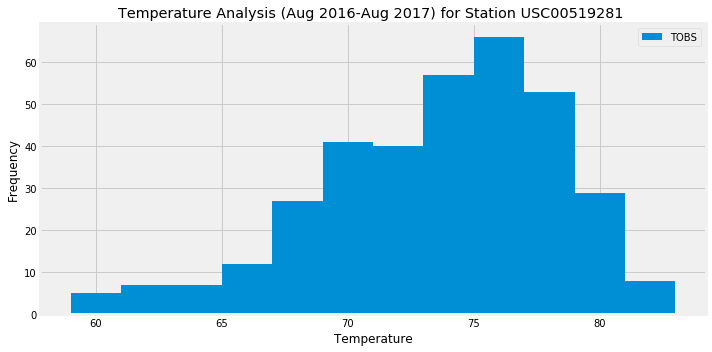

In [26]:
# Creating Histogram with second Created highest_temp dataframe
# plt.hist(highest_temp_df2['tobs'], bins = 12)

# Creating Histogram with first Created highest_temp dataframe
highest_temp_df.plot.hist(title = "Temperature Analysis (Aug 2016-Aug 2017) for Station USC00519281 ", bins=12, figsize=(10,5))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("Images/temperature_vs_frequency.png")
plt.show()

## Bonus Challenge Assignment

------
## Temperature Analysis I

* Is there a meaningful difference between the temperature in June & December?
* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [27]:
# find the first and last date for calculations

first_date =session.query(Measurement.date).order_by(Measurement.date).first()[0]
# first_date # '2010-01-01'

last_date =session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
# last_date # '2017-08-23'

### June Avg Temperature Calculation from 2010 to 2017

In [105]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
# Turned my partial part of code into bold. Used this site for help -->  https://www.kite.com/python/answers/how-to-print-in-bold-in-python#:~:text=Use%20ANSI%20escape%20sequences%20to,formatting%20for%20any%20following%20strings.
june_avg = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date)=="06").all()

# june_avg

print(f'Average Temp in the month of June is \033[1m {round(june_avg[0][0],2)}°F\033[0m')
                    

Average Temp in the month of June is  74.94°F


### June Avg Temperature Calculation (each year)

   * I just wanted to see it for each year (not part of the homework)

In [93]:
june_year = session.query(func.strftime("%Y", Measurement.date), func.avg(Measurement.tobs)).\
                   filter(func.strftime("%m", Measurement.date)=="06").\
                   group_by(func.strftime("%Y", Measurement.date)).all()
june_year

june_year_df = pd.DataFrame(june_year, columns = ["June", "Avg Temp"])

june_year_df.head(10)

,June,Avg Temp
0,2010,74.925620
1,2011,73.938326
2,2012,74.000000
3,2013,74.599078
4,2014,75.027907
5,2015,74.990148
6,2016,75.175258
7,2017,77.219895


### December Temperature Calculation from 2010 to 2016

In [104]:
# Identify the average temperature in December at all stations across all available years in the dataset. 
december_avg = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date)=="12").all()
december_avg

print(f'Average Temp in the month of December is \033[1m{round(december_avg[0][0],2)}°F\033[0m')

Average Temp in the month of December is 71.04°F


### December Avg Temperature Calculation (each year)

   * I just wanted to see it for each year (not part of the homework)

In [95]:
december_year = session.query(func.strftime("%Y", Measurement.date), func.avg(Measurement.tobs)).\
                   filter(func.strftime("%m", Measurement.date)=="12").\
                   group_by(func.strftime("%Y", Measurement.date)).all()
december_year

december_year_df = pd.DataFrame(december_year, columns = ["December", "Avg Temp"])

december_year_df.head(10)

,December,Avg Temp
0,2010,70.208511
1,2011,70.820628
2,2012,71.188073
3,2013,71.094017
4,2014,69.896861
5,2015,73.423913
6,2016,71.130000


## T-test for June and December Temps: 
* By looking at the average temps we can say that there is not a significant difference in Average Temps for the month of June and December and having a PValue > 0.05 shows that the null hypothesis is true and  means that no effect was observed.

In [107]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
# Will you use a paired t-test, or an unpaired t-test? Why?
# I set the var.equal=FALSE since the variances in this 2 groups aren't equal (June has 30 days,December has 31 days)

june = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()

december = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()

two_sample_results = scipy.stats.ttest_ind(june, december, equal_var = False) 
two_sample_results


Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))

------
## Temperature Analysis II

* The starter notebook contains a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d`. The function will return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (TMAX-TMIN) value as the y error bar (YERR).

In [108]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [109]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
previous_year_start = dt.date(2017,8,1) - dt.timedelta(days=365)
previous_year_end = dt.date(2017,8,9) - dt.timedelta(days=365)
# print(previous_year_start)
# print(previous_year_end)

previous_year_temps = calc_temps(previous_year_start, previous_year_end)
print (f"Last Year's Temps Results are: \n Min Temp: {trip_temps[0][0]} \n Avg Temp: {round(trip_temps[0][1],2)} \n Max Temp: {trip_temps[0][2]}")

NameError: name 'trip_temps' is not defined

### Calclating Temperature During My Trip  (min-temp, max-temp & avg-temp)

In [112]:
# My trip
my_trip = calc_temps('2017-08-01', '2017-08-09')
my_trip

[(71.0, 79.0, 83.0)]

In [113]:
# Create a dataframe using the result
previous_year_temps_df = pd.DataFrame(my_trip, columns=["tmin", "tavg","tmax"])
previous_year_temps_df

,tmin,tavg,tmax
0,71.0,79.0,83.0


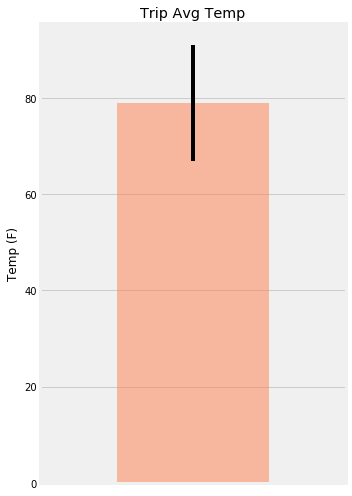

In [126]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

y= "tavg"
title = 'Trip Avg Temp'
error = [previous_year_temps_df["tmax"]-previous_year_temps_df["tmin"]]

previous_year_temps_df.plot(kind = 'bar', y='tavg', yerr= error, title="Trip Avg Temp", color="coral", alpha=0.5, figsize=(5,7), legend=None)
plt.xticks([])
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.savefig("Images/trip_average_temperature.png")
plt.show()

### Rainfall Calculation per weather station

In [127]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# id INTEGER
# station TEXT
# name TEXT
# latitude FLOAT
# longitude FLOAT
# elevation FLOAT
rainfall = (session.query
                        (Station.station, 
                         Station.name, 
                         Station.latitude, 
                         Station.longitude, 
                         Station.elevation,
                         func.avg(Measurement.prcp)).\
                    filter(Measurement.station == Station.station).\
                    filter(Measurement.date.between(previous_year_start, previous_year_end)).\
                
                    group_by(Station.station).\
                
                    order_by(func.avg(Measurement.prcp).desc()).all())

#rainfall

# Convert query object to data frame
rainfall_df = pd.DataFrame(rainfall, columns = ['station','name', 'latitude', 'longitude', 'elevation', 'avg_prcp'])
rainfall_df.set_index('station')

,name,latitude,longitude,elevation,avg_prcp
station,,,,,
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.046000
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.702222
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.435556
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.208000
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.145556
USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.065556
USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.045000


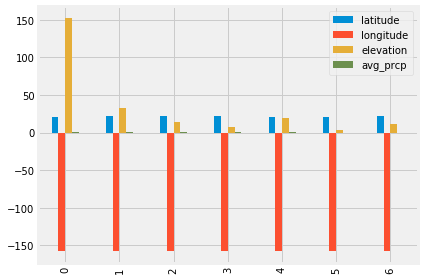

In [128]:
# Plot the Results in a Matplotlib bar chart
rainfall_df.plot.bar()
plt.tight_layout()
plt.savefig("Images/rain_fall.png")
plt.show()

In [129]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

### Calculate the daily normals for my trip 08-01 to 08-09

In [130]:
# push each tuple of calculations into a list called `normals`
# Set the start and end dat +e of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings

# I eliminated too many steps and did majority of requeste steps in one line. 
# for this section I got help from this post--> https://stackoverflow.com/questions/34898525/generate-list-of-months-between-interval-in-python

trip_dates= pd.date_range(start ='2017-08-01', end ='2017-08-09').strftime("%m-%d").to_list()
trip_dates

['08-01',
 '08-02',
 '08-03',
 '08-04',
 '08-05',
 '08-06',
 '08-07',
 '08-08',
 '08-09']

In [131]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_dates:  # Loop through the list of %m-%d strings and calculate the normals for each date
    normal = daily_normals(date)
    normals.append(normal)    # push each tuple of calculations into a list called `normals`
    #normals.append(date)
# normals

# I used this source for help in order to be able to loop through the list of normals --> https://ispycode.com/Python/Flow-Control/Itertools-Module/chain-from_iterable
normals_chain = itertools.chain.from_iterable(normals)
print(normals)

[[(67.0, 75.54, 83.0)], [(68.0, 75.60377358490567, 84.0)], [(70.0, 76.61111111111111, 85.0)], [(69.0, 76.71153846153847, 84.0)], [(69.0, 76.14814814814815, 82.0)], [(67.0, 76.25, 83.0)], [(71.0, 77.15686274509804, 83.0)], [(68.0, 76.5576923076923, 83.0)], [(69.0, 75.98039215686275, 81.0)]]


In [132]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_days_df = pd.DataFrame(normals_chain, columns = ["tmin", "tmax", "tavg"], index = trip_dates)
trip_days_df.index.name = 'date'
trip_days_df

,tmin,tmax,tavg
date,,,
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0
08-08,68.0,76.557692,83.0
08-09,69.0,75.980392,81.0


### Daily Normals Area Plot

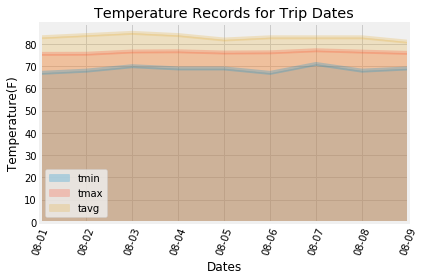

In [134]:
# Plot the daily normals as an area plot with `stacked=False`
trip_days_df.plot(kind = 'area', stacked = False, alpha = 0.25)
plt.xticks(rotation = 70)
plt.title(f"Temperature Records for Trip Dates")
plt.xlabel("Dates")
plt.ylabel("Temperature(F)")
plt.tight_layout()
plt.savefig("Images/daily_area_plot.png")
plt.show()